## Using Deep Learning to Predict Selling Prices of Houses


#### This is an analysis of a housing dataset from King County, Washington and the creation of a deep learning model to predict the selling price; dataset available from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('kc_house_data.csv')

## **Step 1:** Check for any missing data

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Since there is no missing data, analysis can continue

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## **Step 2:** Analysis of several features from the dataset

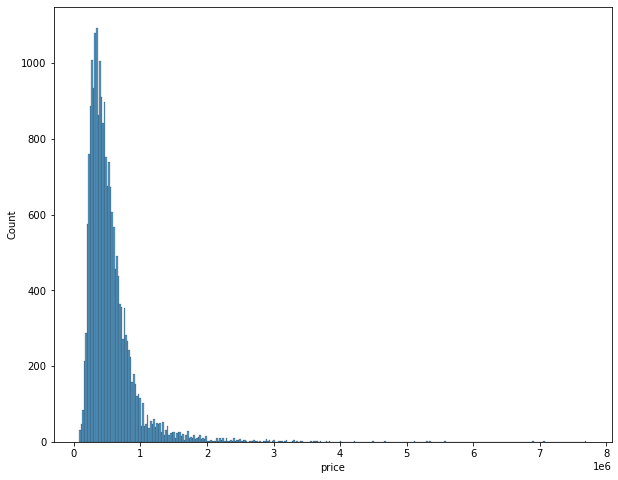

In [5]:
plt.figure(figsize=(10,8))

sns.histplot(df['price']);

#### The graph shows that the majority of the houses sold in King County are sold between zero and 1.5 million, the graph below shows the correlation between each column and the price the house sold at

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64


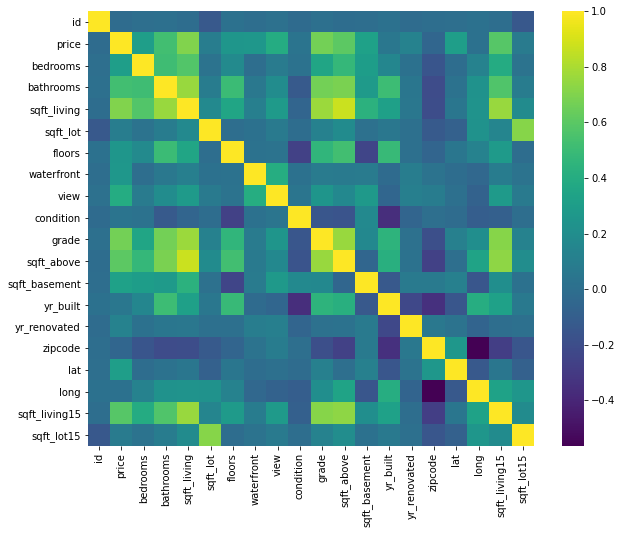

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap = 'viridis')
print(df.corr()['price'].sort_values());

#### From above it is clear that there is some correlation between bedrooms and price
#### What is the most common number of bedrooms in this market?

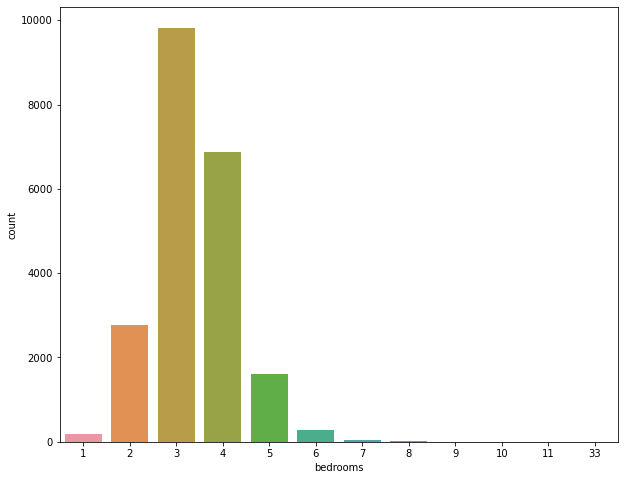

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(x='bedrooms',data = df);

#### The graph above shows most houses have 3 bedrooms in this market

#### We can see that there is more of a correlation between bathrooms and price than bedroom and price

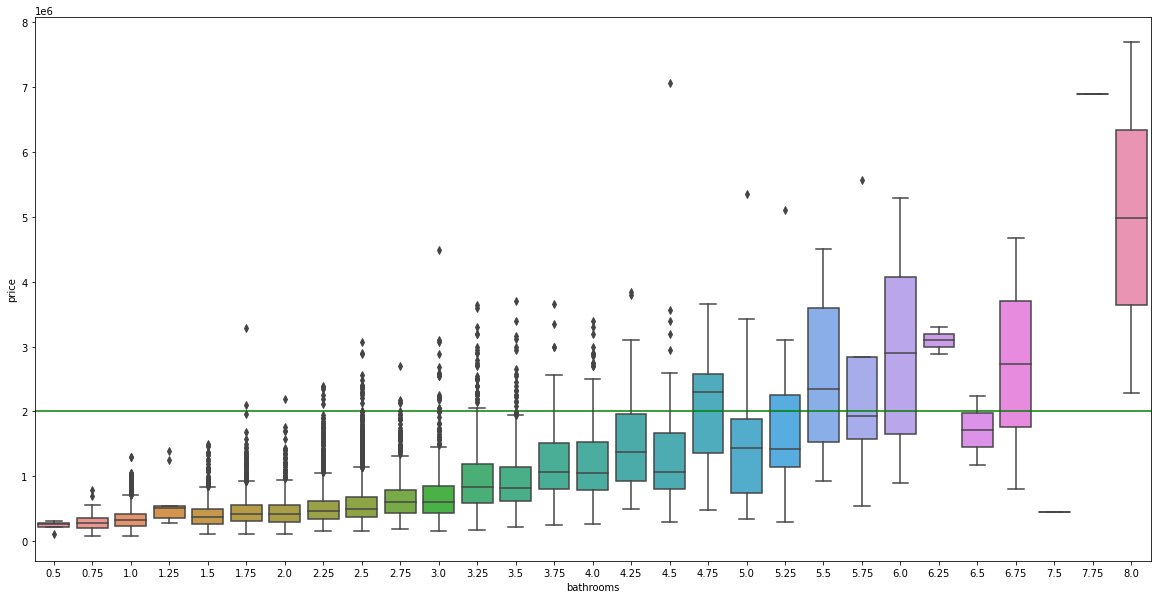

In [8]:
plt.figure(figsize = (20,10))
plt.axhline(y = 2000000, color = 'g')
sns.boxplot(x = 'bathrooms', y = 'price',data = df);

#### The graph above shows that after 4.0 bathrooms there is an increased variablity in the median price. The green lines shows that the majority of the box and whiskers plot have their median selling price below 2,000,000.

#### For the model to be more useful it may have a threshold around 2,000,000.


#### The feature with the greatest correlation with price is sqft_living and the graph below shows a linear relationship.

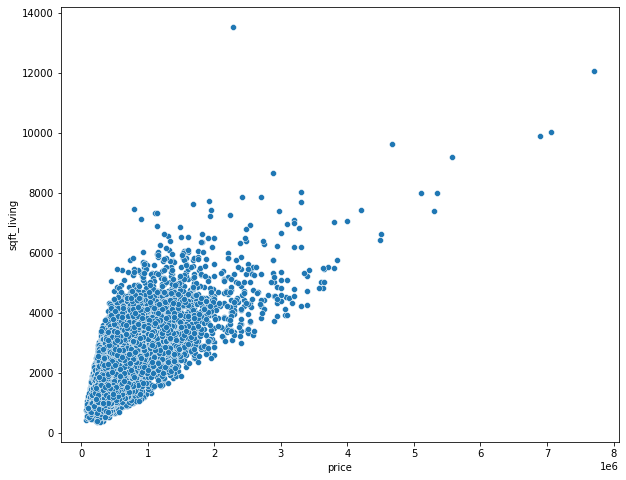

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'price', y = 'sqft_living',data = df);

#### Latitude and Longitude have interesting correlations to price, so it would be useful to construct a map and look at lat and long in relation to price

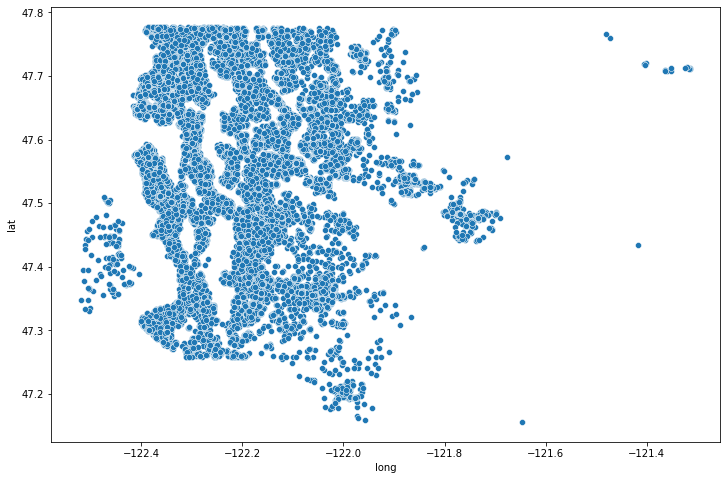

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y ='lat', data = df);

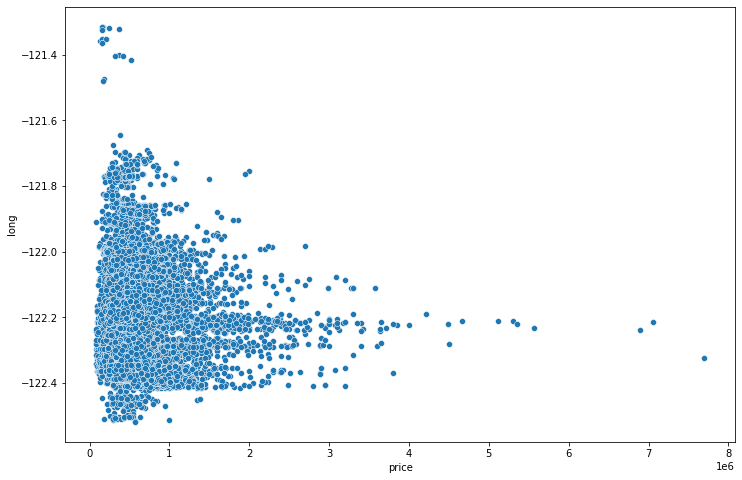

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data = df);

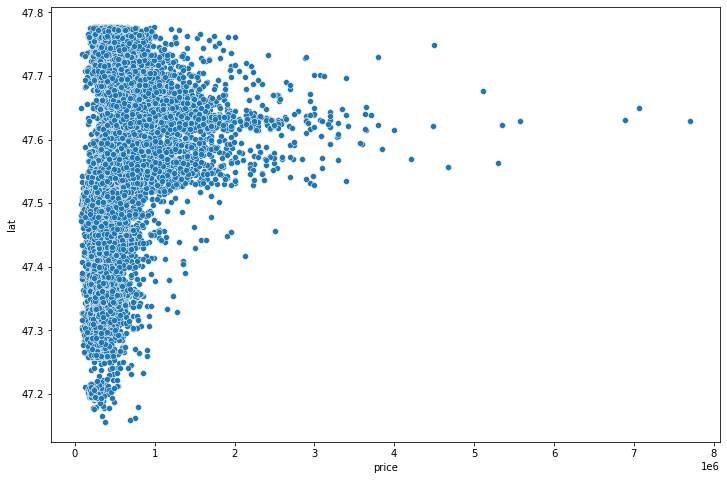

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data = df);

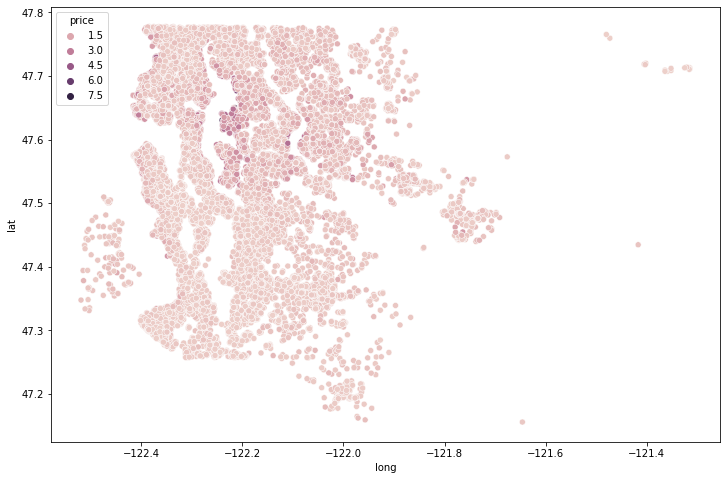

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y ='lat', data = df, hue = 'price');

### The graphs above show that there is a relationship between specific lat/long and price, however there are still a lot of outliers

## **Step 3:** Create dataframe without the highest priced houses

In [14]:
df.sort_values('price',ascending = False).head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,3377900195,9/29/2014,2530000.0,4,5.50,6930,45100,1.0,0,0,...,11,4310,2620,1950,1991,98006,47.5547,-122.144,2560,37766
17544,7631800015,4/7/2015,2510000.0,3,3.25,5480,57990,2.0,1,4,...,11,5480,0,1991,0,98166,47.4558,-122.371,2500,22954
7304,6072800170,4/28/2015,2500000.0,4,4.00,3330,24354,1.0,0,0,...,10,3330,0,1961,0,98006,47.5708,-122.192,3880,25493
17137,4107100190,3/24/2015,2500000.0,4,3.75,3480,14850,1.0,0,4,...,9,1870,1610,1951,2013,98004,47.6227,-122.216,4780,18480


In [15]:
houses = df[df['price'] <= 2500000.0].sort_values('price',ascending = False)
houses.shape

(21500, 21)

#### The new dataframe consists of only houses that sold for 2,500,000 or more

#### With the new dataframe the map is more clear in showing were the more expensive houses are around the water

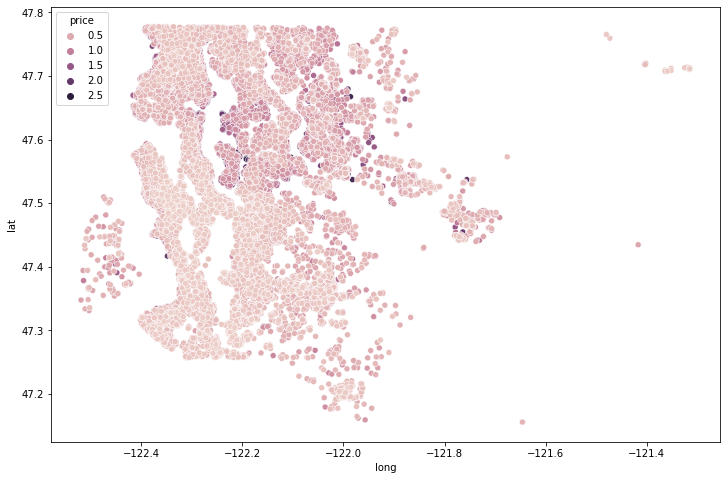

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y ='lat', data = houses,  hue = 'price');

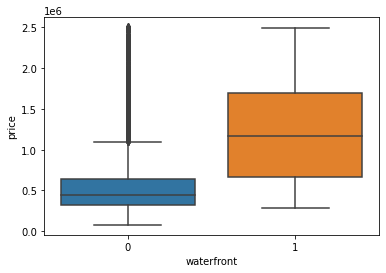

In [17]:
sns.boxplot(x = 'waterfront', y = 'price', data = houses);

#### This shows that a waterfront house will commonly have a higher price than a house not on the water. However, the heatmap from Step 2 showed a low correlation value of 0.266398 between waterfront and price.


## **Step 4:** Feature Enginerring

#### 'id' column is useless and we want the date column to be date-time instead of string 
#### 'month' and 'year' columns would be useful


In [18]:
houses = houses.drop('id', axis = 1)

In [19]:
houses['date'].head()

7499       5/5/2015
7304      4/28/2015
4028     12/29/2014
17137     3/24/2015
16811     10/9/2014
Name: date, dtype: object

In [20]:
houses['date'] = pd.to_datetime(houses['date'])

In [21]:
houses['date'].head()

7499    2015-05-05
7304    2015-04-28
4028    2014-12-29
17137   2015-03-24
16811   2014-10-09
Name: date, dtype: datetime64[ns]

In [22]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7499,2015-05-05,2500000.0,4,3.25,3960,16224,2.0,0,2,3,12,3100,860,1938,0,98105,47.6701,-122.259,3960,15050
7304,2015-04-28,2500000.0,4,4.00,3330,24354,1.0,0,0,4,10,3330,0,1961,0,98006,47.5708,-122.192,3880,25493
4028,2014-12-29,2500000.0,5,3.25,5620,12672,2.0,0,0,4,11,4140,1480,1916,0,98144,47.5786,-122.287,4470,8050
17137,2015-03-24,2500000.0,4,3.75,3480,14850,1.0,0,4,3,9,1870,1610,1951,2013,98004,47.6227,-122.216,4780,18480
16811,2014-10-09,2500000.0,4,4.50,4300,19844,2.0,0,0,3,11,4300,0,1985,1999,98039,47.6218,-122.237,3070,19845


In [23]:
houses['year'] = houses['date'].apply(lambda date: date.year)
houses['month'] = houses['date'].apply(lambda date: date.month)

In [24]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
7499,2015-05-05,2500000.0,4,3.25,3960,16224,2.0,0,2,3,...,860,1938,0,98105,47.6701,-122.259,3960,15050,2015,5
7304,2015-04-28,2500000.0,4,4.00,3330,24354,1.0,0,0,4,...,0,1961,0,98006,47.5708,-122.192,3880,25493,2015,4
4028,2014-12-29,2500000.0,5,3.25,5620,12672,2.0,0,0,4,...,1480,1916,0,98144,47.5786,-122.287,4470,8050,2014,12
17137,2015-03-24,2500000.0,4,3.75,3480,14850,1.0,0,4,3,...,1610,1951,2013,98004,47.6227,-122.216,4780,18480,2015,3
16811,2014-10-09,2500000.0,4,4.50,4300,19844,2.0,0,0,3,...,0,1985,1999,98039,47.6218,-122.237,3070,19845,2014,10


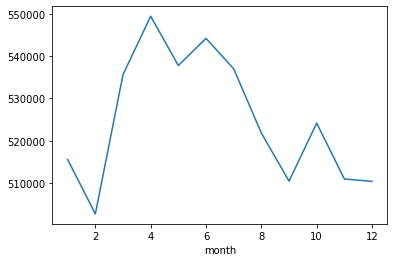

In [25]:
houses.groupby('month').mean()['price'].plot();

#### While 510000 to 550000 the graph shows that the spring is the season with the most sales

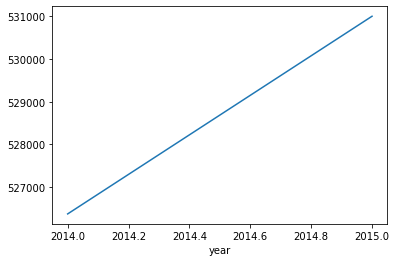

In [26]:
houses.groupby('year').mean()['price'].plot();

#### Here the graph shows that there is a constant increase in price due to inflation

#### There are a few columns that need to be dropped as they lack value: date, and zipcode:
    With month and year the date column is no longer useful
    Dropping the zipcode would be best so that the model does not assume that it is a continuous variable and there is a
    lack of domain knowledge that realtor in King County would know because location is very important in the housing
    market.




In [27]:
houses = houses.drop('date',axis = 1)
houses = houses.drop('zipcode',axis = 1)
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
7499,2500000.0,4,3.25,3960,16224,2.0,0,2,3,12,3100,860,1938,0,47.6701,-122.259,3960,15050,2015,5
7304,2500000.0,4,4.00,3330,24354,1.0,0,0,4,10,3330,0,1961,0,47.5708,-122.192,3880,25493,2015,4
4028,2500000.0,5,3.25,5620,12672,2.0,0,0,4,11,4140,1480,1916,0,47.5786,-122.287,4470,8050,2014,12
17137,2500000.0,4,3.75,3480,14850,1.0,0,4,3,9,1870,1610,1951,2013,47.6227,-122.216,4780,18480,2015,3
16811,2500000.0,4,4.50,4300,19844,2.0,0,0,3,11,4300,0,1985,1999,47.6218,-122.237,3070,19845,2014,10


In [28]:
pd.DataFrame(houses['sqft_basement'].value_counts())

,sqft_basement
0,13088
600,220
700,217
500,214
800,205
...,...
176,1
1920,1
792,1
65,1


#### The dataframe above shows the there are 13088 entries of houses with no basement. Since there is a correlation between square foot of basement and price the column will be left as is.

#### We can see the there are 13088 entries in the dataset that has no basement. We do not need to alter this into a binary variable since as we can see from above there is a correlation between the square foot of the basement and the price is 0.323799.

#### Now that we are complete with feature engineering we can begin creating our training and test datasets

In [29]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
7499,2500000.0,4,3.25,3960,16224,2.0,0,2,3,12,3100,860,1938,0,47.6701,-122.259,3960,15050,2015,5
7304,2500000.0,4,4.00,3330,24354,1.0,0,0,4,10,3330,0,1961,0,47.5708,-122.192,3880,25493,2015,4
4028,2500000.0,5,3.25,5620,12672,2.0,0,0,4,11,4140,1480,1916,0,47.5786,-122.287,4470,8050,2014,12
17137,2500000.0,4,3.75,3480,14850,1.0,0,4,3,9,1870,1610,1951,2013,47.6227,-122.216,4780,18480,2015,3
16811,2500000.0,4,4.50,4300,19844,2.0,0,0,3,11,4300,0,1985,1999,47.6218,-122.237,3070,19845,2014,10


## **Step 5:** Prepare before creating the model

In [30]:
y = houses['price'].values
X = houses.drop('price',axis = 1).values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Step:6**  Creation of the Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
X_train.shape

(15050, 19)

#### The number of Neurons in each layer will be 19, and 4 layers with a 5th output layer

In [35]:
model = Sequential ()
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss = 'mse')

In [36]:
model.fit(x=X_train,y=y_train,
          validation_data = (X_test,y_test), batch_size = 128 , epochs = 400, verbose = 0)

In [37]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,3.740136e+11,3.797437e+11
1,3.735020e+11,3.776919e+11
2,3.637333e+11,3.533204e+11
3,3.076284e+11,2.545361e+11
4,1.754413e+11,1.077060e+11
...,...,...
395,2.274925e+10,2.431163e+10
396,2.274097e+10,2.421692e+10
397,2.272342e+10,2.419426e+10
398,2.273076e+10,2.423975e+10


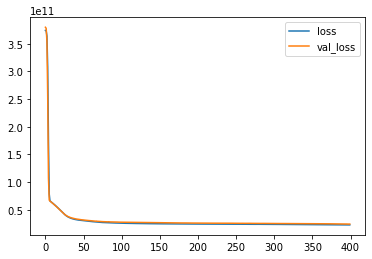

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot();

#### The graph above shows that there is no overfitting

In [39]:
from sklearn.metrics import mean_absolute_error, explained_variance_score
predictions= model.predict(X_test)
mean_absolute_error(y_test, predictions)

101892.32582606589

In [40]:
df['price'].mean()

540296.5735055795

In [41]:
print('The predicted price is',round(mean_absolute_error(y_test, predictions)/df['price'].mean() * 100, 3),'% off of the true price')

The predicted price is 18.859 % off of the true price


In [42]:
explained_variance_score(y_test, predictions)

0.7500537431640925

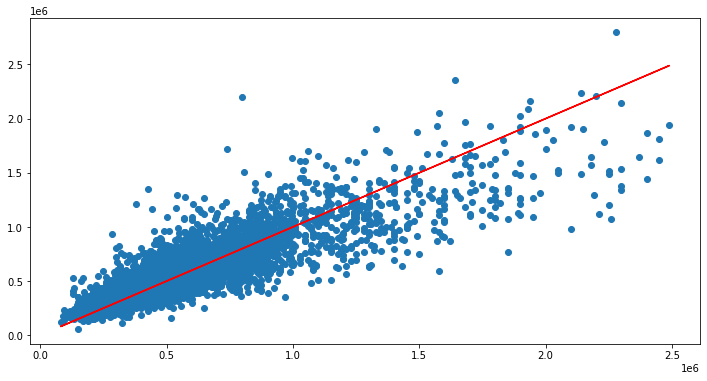

In [43]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r');

#### The model is better at predicting the less expensive houses than the more expensive houses

#### To further improve the model, further feature engineering may be needed